In [ ]:
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM,BatchNormalization , GRU
# from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD

In [ ]:

#IMPORT THE LIBRARIES
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
import IPython.display as ipd
from IPython.display import Audio
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM,BatchNormalization , GRU
from tensorflow.keras.preprocessing.text import Tokenizer
# from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD



import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
import tensorflow as tf
print ("Done")

Done


In [ ]:
!apt-get update
!apt-get install -y libsndfile1

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,551 kB]
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [2,816 kB]
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/restricted amd64 Package

In [ ]:
Emotions = pd.read_csv('/content/emotion (1).csv')
Emotions.head()

,0,1,2,3,4,5,6,7,8,9,...,1611,1612,1613,1614,1615,1616,1617,1618,1619,Emotions
0,0.000000,0.138672,0.374023,0.596191,0.803711,0.829590,0.762207,0.746582,0.749023,0.804688,...,1.561504,1.319979,1.056972,0.787825,0.527491,0.289547,0.085066,-0.077929,-0.194974,neutral
1,0.250488,0.370605,0.497070,0.487305,0.502930,0.505859,0.498047,0.500977,0.497070,0.496094,...,4.523232,-1.347257,-0.957115,1.921302,2.827643,1.620335,-4.741804,-0.370617,2.210921,neutral
2,0.288086,0.415527,0.546875,0.557617,0.548828,0.559570,0.574707,0.563477,0.548828,0.544922,...,1.045633,0.986276,0.923777,0.862874,0.808141,0.763651,0.732594,0.717091,0.717985,neutral
3,0.252930,0.381836,0.500977,0.504883,0.515137,0.514648,0.525391,0.518066,0.508301,0.513184,...,1.774708,0.606135,3.745261,-2.928764,-4.074190,-1.598278,-0.978355,-1.137704,1.503877,neutral
4,0.317383,0.500488,0.583496,0.394531,0.265625,0.083008,0.131836,0.155273,0.235352,0.443359,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,sad


In [ ]:
Emotions=Emotions.fillna(0)
print(Emotions.isna().any())
Emotions.shape

0           False
1           False
2           False
3           False
4           False
            ...  
1616        False
1617        False
1618        False
1619        False
Emotions    False
Length: 1621, dtype: bool


(12153, 1621)

In [ ]:
np.sum(Emotions.isna())

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


,0
0,0
1,0
2,0
3,0
4,0
...,...
1616,0
1617,0
1618,0
1619,0


# Data preparation

In [ ]:

Emotions = Emotions[Emotions['Emotions'] != 0]

# Extract X and Y again
X = Emotions.iloc[:, :-1].values
Y = Emotions['Emotions'].values


In [ ]:
set(Y)

{'angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise'}

In [ ]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder
Y = np.array(Y, dtype=str)
encoder = OneHotEncoder()
Y = encoder.fit_transform(Y.reshape(-1, 1)).toarray()


In [ ]:
print(Y.shape)
X.shape

(12152, 7)


(12152, 1620)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=42,test_size=0.2, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((9721, 1620), (9721, 7), (2431, 1620), (2431, 7))

In [ ]:
X_train = x_train.reshape(x_train.shape[0] , x_train.shape[1] , 1)
X_test = x_test.reshape(x_test.shape[0] , x_test.shape[1] , 1)

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((9721, 1620), (9721, 7), (2431, 1620), (2431, 7))

# LSTM Model

In [ ]:
model01 = Sequential()
model01.add(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model01.add(Dropout(0.2))
model01.add(LSTM(128, return_sequences=True))
model01.add(LSTM(128, return_sequences=True))
model01.add(LSTM(128, return_sequences=True))
model01.add(LSTM(128, return_sequences=True))
model01.add(LSTM(128, return_sequences=True))
model01.add(LSTM(128))
model01.add(Dense(7, activation='softmax'))  # Ensure 8 classes

# Compile the model
model01.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [21]:
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
hist = model01.fit(
    X_train, y_train,
    epochs=20,
    validation_data=(X_test, y_test),
    batch_size=64,
    verbose=1,
    # callbacks=[early_stopping]
)


Epoch 1/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 76s 447ms/step - accuracy: 0.1926 - loss: 1.8875 - val_accuracy: 0.1979 - val_loss: 1.8493
Epoch 2/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 80s 456ms/step - accuracy: 0.1972 - loss: 1.8582 - val_accuracy: 0.1909 - val_loss: 1.8437
Epoch 3/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 76s 500ms/step - accuracy: 0.1952 - loss: 1.8656 - val_accuracy: 0.1880 - val_loss: 1.8647
Epoch 4/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 78s 472ms/step - accuracy: 0.2039 - loss: 1.8578 - val_accuracy: 0.2016 - val_loss: 1.8843
Epoch 5/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 76s 499ms/step - accuracy: 0.1962 - loss: 1.8767 - val_accuracy: 0.1872 - val_loss: 1.8832
Epoch 6/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 82s 498ms/step - accuracy: 0.1854 - loss: 1.8819 - val_accuracy: 0.1855 - val_loss: 1.9179
Epoch 7/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 78s 472ms/step - accuracy: 0.1627 - loss: 1.9137 - val_accuracy: 0.1855 - val_loss: 1.9132
Epoch 8/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 86s 501ms/step - accuracy: 0.1681 - loss: 1

Adding attention into the LSTM architecture

In [26]:
import tensorflow as tf
from tensorflow.keras.layers import Layer

class Attention(Layer):
    def __init__(self, **kwargs):
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W = self.add_weight(
            name="attention_weight", shape=(input_shape[-1], 1), initializer="normal"
        )
        self.b = self.add_weight(
            name="attention_bias", shape=(input_shape[1], 1), initializer="zeros"
        )
        super(Attention, self).build(input_shape)

    def call(self, x):
        e = tf.nn.tanh(tf.tensordot(x, self.W, axes=1) + self.b)
        a = tf.nn.softmax(e, axis=1)
        output = x * a
        return tf.reduce_sum(output, axis=1)


In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model0 = Sequential()
model0.add(LSTM(256, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model0.add(Dropout(0.3))
model0.add(LSTM(256, return_sequences=True))
model0.add(Dropout(0.3))
model0.add(Attention())
model0.add(Dense(7, activation='softmax'))

model0.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
hist=model0.fit(X_train, y_train,
            epochs=20,
            validation_data=(X_test, y_test),batch_size=64,
            verbose=1)


Epoch 1/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 55s 334ms/step - accuracy: 0.2608 - loss: 1.7682 - val_accuracy: 0.3665 - val_loss: 1.5689
Epoch 2/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 78s 307ms/step - accuracy: 0.3827 - loss: 1.5307 - val_accuracy: 0.4007 - val_loss: 1.4883
Epoch 3/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 89s 352ms/step - accuracy: 0.4208 - loss: 1.4665 - val_accuracy: 0.4183 - val_loss: 1.4433
Epoch 4/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 74s 300ms/step - accuracy: 0.4368 - loss: 1.4221 - val_accuracy: 0.4192 - val_loss: 1.4315
Epoch 5/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 81s 295ms/step - accuracy: 0.4607 - loss: 1.3529 - val_accuracy: 0.4907 - val_loss: 1.3286
Epoch 6/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 44s 290ms/step - accuracy: 0.4834 - loss: 1.3120 - val_accuracy: 0.5125 - val_loss: 1.2888
Epoch 7/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 85s 310ms/step - accuracy: 0.5095 - loss: 1.2488 - val_accuracy: 0.5105 - val_loss: 1.2519
Epoch 8/20
152/152 ━━━━━━━━━━━━━━━━━━━━ 80s 296ms/step - accuracy: 0.5356 - loss: 1

76/76 ━━━━━━━━━━━━━━━━━━━━ 5s 70ms/step - accuracy: 0.6048 - loss: 1.0100
Accuracy of our model on test data :  60.51008105278015 %


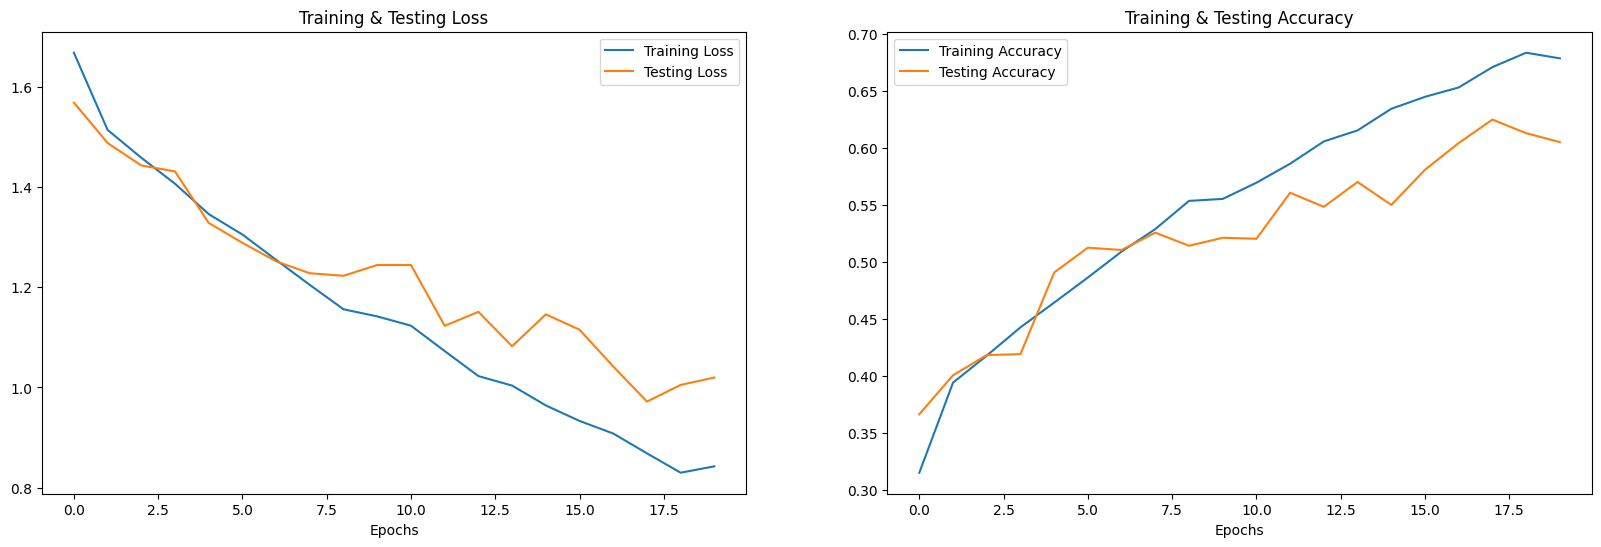

In [30]:
print("Accuracy of our model on test data : " , model0.evaluate(X_test,y_test)[1]*100 , "%")
epochs = [i for i in range(20)]
fig , ax = plt.subplots(1,2)
train_acc = hist.history['accuracy']
train_loss = hist.history['loss']
test_acc = hist.history['val_accuracy']
test_loss = hist.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

# Evaluation

# Saving Best Model

In [37]:
from tensorflow.keras.models import Sequential, model_from_json

model0.save('/content/LSTM_Model.keras')
model0.save_weights("/content/LSTM_Model.weights.h5")
print("Saved model to disk")

Saved model to disk
